In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import os

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
# 读取数据
df = pd.read_csv('../../data/pythonhomework6csv.csv')
df

,Unnamed: 0,year,month,day,RMM1,RMM2,phase,amplitude,final_values
0,0,1974,6,1,1.634470,1.203040,5,2.029480,Final_value:__OLR_&_NCEP_winds
1,1,1974,6,2,1.602890,1.015120,5,1.897290,Final_value:__OLR_&_NCEP_winds
2,2,1974,6,3,1.516250,1.085510,5,1.864760,Final_value:__OLR_&_NCEP_winds
3,3,1974,6,4,1.509810,1.035730,5,1.830920,Final_value:__OLR_&_NCEP_winds
4,4,1974,6,5,1.559060,1.305180,5,2.033260,Final_value:__OLR_&_NCEP_winds
...,...,...,...,...,...,...,...,...,...
17460,17460,2022,3,21,1.058647,-1.269627,3,1.653084,Prelim_value:_OLR_&_ACCESS_wind
17461,17461,2022,3,22,1.039455,-0.817596,4,1.322471,Prelim_value:_OLR_&_ACCESS_wind
17462,17462,2022,3,23,0.981937,-0.722337,4,1.219004,Prelim_value:_OLR_&_ACCESS_wind
17463,17463,2022,3,24,0.900615,-0.630580,4,1.099426,Prelim_value:_OLR_&_ACCESS_wind


In [3]:
# 把异常值替换成0
df['RMM1']=df['RMM1'].replace(df['RMM1'].max(),0)
df['RMM2']=df['RMM2'].replace(df['RMM2'].max(),0)

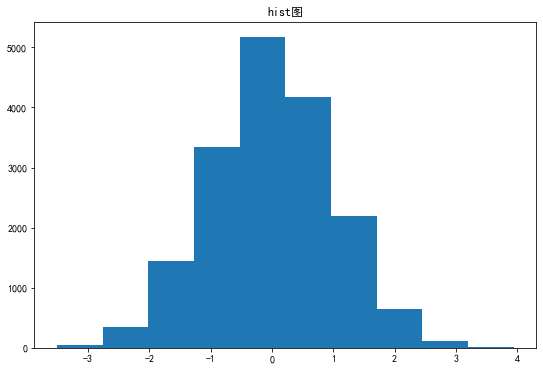

In [4]:
# 利用hist绘出mjo的rmm1的分布情况
RMM1=df['RMM1']
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1, 1)
ax.hist(RMM1)
ax.set_title('hist图')
if not os.path.exists('../../picture/Pythonhome/8'):
    os.makedirs('../../picture/Pythonhome/8')
plt.savefig('../../picture/Pythonhome/8/hist.png')

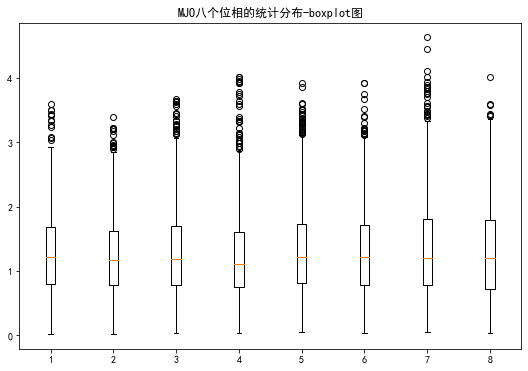

In [5]:
# 利用boxplot画出MJO的八个位相下振幅的统计分布
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
for i in np.arange(1,9,1):
    num=df['amplitude'].loc[df['phase']==i]
    ax.boxplot(num,positions=[i])
ax.set_title('MJO八个位相的统计分布-boxplot图')
fig.savefig('../../picture/Pythonhome/8/boxplot.png')

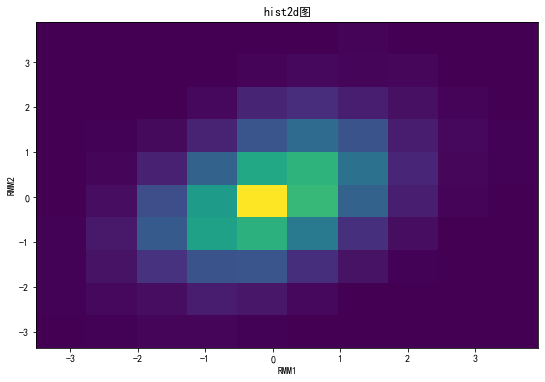

In [6]:
# 利用hexbin绘出MJO的rmm2指数与rmm1指数相差15天的二维直方图
RMM1=df['RMM1'].loc[:17449]
RMM2=df['RMM2'].loc[15:]
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
ax.hist2d(RMM1,RMM2)
ax.set_xlabel('RMM1')
ax.set_ylabel('RMM2')
ax.set_title('hist2d图')
fig.savefig('../../picture/Pythonhome/8/hexbin.png')

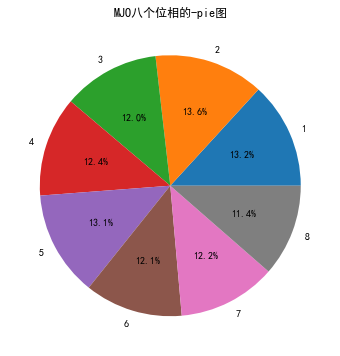

In [7]:
# 画出MJO八个位相分布的饼状图
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
num=[]
for i in np.arange(1,9,1):
    num.append(len(df[df['phase']==i]))
ax.pie(num,labels=['1','2','3','4','5','6','7','8'],autopct='%1.1f%%')
ax.set_title('MJO八个位相的-pie图')
fig.savefig('../../picture/Pythonhome/8/pie.png')

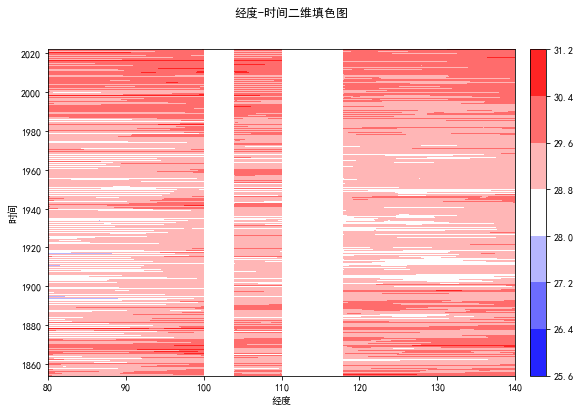

In [8]:
# 利用sst.mnmean.nc画出赤道地区80E－140E的海温随时间变化的二维填色图（注时间一维，经度变化一维）。
ds =xr.open_dataset('../../data/sst.mnmean.nc')
sst=ds['sst'].loc[:,0,80:140]
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1,1)
colorbar=ax.contourf(sst['lon'].data,sst['time'][:].data,sst.data,cmap='bwr')
plt.colorbar(colorbar, extendrect='True', pad=0.03, fraction=0.04, shrink=1)
ax.set_xlabel('经度')
ax.set_ylabel('时间')
fig.suptitle('经度-时间二维填色图')
fig.savefig('../../picture/Pythonhome/8/二维填色图.png')

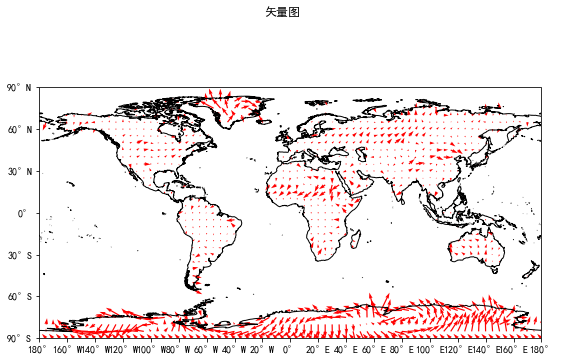

In [9]:
# 利用quiver画出“气象数据中”ERA5_uv_202111.nc的矢量图，注意调整好矢量的在图上的分布密度。
ds =xr.open_dataset('../../data/ERA5_uv_202111.nc')
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(1, 1,subplot_kw={'projection':ccrs.PlateCarree()})
ax.coastlines('50m')
lat=ds['latitude'].data
lon=ds['longitude'].data
lons,lats=np.meshgrid(lon,lat)
ax.quiver(lons[::50,::50],lats[::50,::50],ds['u10'].loc['2021-11-01',::50,::50].data,ds['v10'].loc['2021-11-01',::50,::50].data,color='r')
# 标注坐标轴
ax.set_xticks(np.arange(-180, 180 + 20, 20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=ccrs.PlateCarree())
# 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
fig.suptitle('矢量图')
fig.savefig('../../picture/Pythonhome/8/矢量图.png')